In [1]:
using Plots
using LaTeXStrings
using DataFrames
using CSV
using LsqFit
using LinearAlgebra

In [2]:
Y=[-0.85
-0.74
-0.54
-0.35
-0.2
-0.02
0.26
0.41
0.73
0.88
1.26
1.3
1.54
1.77
1.94
2.15
2.46
2.68
2.99
3.20
3.32]
X=zeros(21)
for i in 1:21
    X[i]=5(i-1)
end
Y

21-element Vector{Float64}:
 -0.85
 -0.74
 -0.54
 -0.35
 -0.2
 -0.02
  0.26
  0.41
  0.73
  0.88
  1.26
  1.3
  1.54
  1.77
  1.94
  2.15
  2.46
  2.68
  2.99
  3.2
  3.32

In [3]:
b=0
for i in 1:21
    k=2
    b+=Y[i]*X[i]^k
end
b

166553.0

### Ajuste polinómico

In [4]:
f(x)=(1, x, x^2)
F=zeros(21,3)
for i in 1:3 #Defino F 21x3
    for j in 1:21
        F[j,i]=f(X[j])[i]
    end
end
Ft=transpose(F) #Transpuesta de F 3x21
A=Ft*F #Defino A 3x3
Ainv=inv(A)
b=Ft*Y #Defino b 3x1

3-element Vector{Float64}:
     24.19
   2040.8
 166553.0

In [5]:
p=Ainv*b #Calculo el vector de parametros (p 3x1) ya ajustados usando A*p=b

3-element Vector{Float64}:
 -0.9199265951439873
  0.03766508365776113
  5.5193319266546155e-5

In [6]:
#Errores
dp=norm(F*p-Y)^2 #F*p-Y es un vector de 21 coord. y con norm() calculo la norma (con norma de 2 por defecto)
σ2=dp/(21-3) #Donde 21 son las filas de F y 3 las columnas
Varp=zeros(3)
for i in 1:3 #Defino Var(p_i) es el vector de las varianzas de cada p_i
    Varp[i]=Ainv[i,i]*σ2
end
E=sqrt.(Varp) #Vector de los errores de los parametros p_i (donde el error E_i=√(Var(p_i)))

3-element Vector{Float64}:
 0.03609198892686007
 0.0016725961222572002
 1.6148231106218908e-5

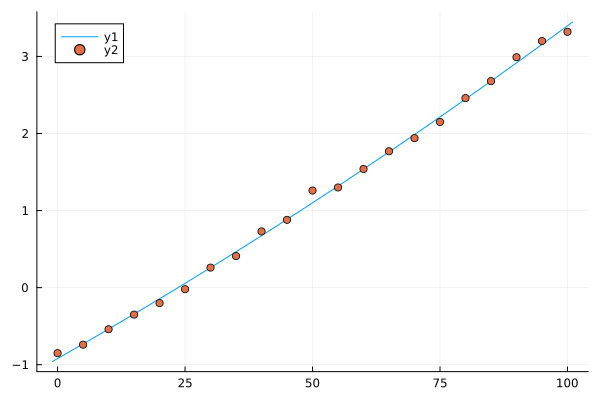

In [7]:
g(x)=p[1]+p[2]*x+p[3]*x^2
x=range(-1,101,length=200)
plot(x,g)
scatter!(X,Y)

In [8]:
g(80)

2.446517340782799